# Finding Heavy Traffic Indicators on the I-94

## Introduction
> The Interstate 94 (I-94) is an east-west Interstate highway stretching 1,585 miles, connecting the Great Lakes and northern Great Plains regions of the United States. The I-94 begins in Port Huron, MI, and ends in Billings, MT. In this project, we will be working with data based on the Interstate 94 and try to understand the traffic congestion that occurs on this road. The data was collected by a station approximately midway between Minneapolis and Saint Paul and is regarding strictly westbound traffic. This means that the conclusions drawn from this study will pertain to westbound traffic and we should avoid generalizing such results to the 1-94 as a whole. The aim of this project is to determine which factors are heavy indicators of high traffic volume. We will be mainly looking at the factors "weather" and "time" to reach our conclusions. The first part of this notebook will focus on cleaning and exploring the dataset, while the second part will center on analyzing and understanding whether or not "time" and "traffic" are indeed indicators of traffic volume.

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
# Loading in the dataset
traffic = pd.read_csv("/Users/omarstinner/Data Files/Python Projects/Files/Guided Project - Finding Heavy Traffic Indicators on the I-94/Metro_Interstate_Traffic_Volume.csv")

In [3]:
# Quick Summary of the data
print(traffic.info())
print(traffic.isnull().sum())
display(traffic.head(5))
display(traffic.tail(5))
traffic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


> Before analyzing, let us look at a summary of our data and get a brief understanding of the contents in our columns. We see that there are no null values present in our dataset. Nearly all the columns seem to have the correct datatype apart from "date-time", which should be converted to a datetime object. The "temp" column is measured in Kelvin degrees, which is a popular measurement amongst scientists but is commonly used or understood by the general public. To analyze the "temp" column, we will convert the units to degrees Celcius for clearer interpretations. Looking at the description of our columns, the minimum temperature in the temp column is 0 Kelvin, equivalent to -273 degrees Celcius, which seems to be quite unrealistic. We can tell that the majority of the hours throughout the days barely had any rain or snow during the data collection period of this dataset. We also see that for half the time in the entirety of the dataset, the sky had cloud coverage of around 64%. Since "traffic_volume" is our main variable of interest let us look at it separately.

## Part 1: Cleaning and Exploring The Data

In [4]:
# Converting "date_time" to a datetime object.
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

# Creating "year", "hour", "month", "weekday" columns 
traffic["year"] = traffic["date_time"].dt.year
traffic["hour"] = traffic["date_time"].dt.hour
traffic["month"] = traffic["date_time"].dt.month
traffic["weekday"] = traffic["date_time"].dt.weekday

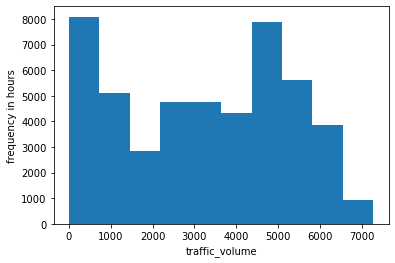

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


4     2087
1     2026
3     2025
2     2015
0     1630
23     912
5      645
6      405
7      183
22      32
8       20
20      13
21      12
9       10
19       6
18       6
13       5
12       4
11       4
16       3
14       3
15       3
10       2
17       2
Name: date_time, dtype: int64

In [5]:
# Exploring the "traffic_volume" column
traffic["traffic_volume"].hist()
plt.grid(False)
plt.xlabel("traffic_volume")
plt.ylabel("frequency in hours")
plt.show()
print(traffic["traffic_volume"].describe())
traffic[traffic["traffic_volume"] <= 1193]["date_time"].dt.hour.value_counts()

> We can tell that from the first day of data collection to the last day, the hourly traffic volume varied from 0 cars to 7280 cars. 25% of the time there were only 1193 cars or less passing through the station. On average there were 3260 cars passing the station each hour. We can see that the hours in which traffic is below 1193 cars are typically at night during the hours of 10 PM to 4 AM. For this reason, an interesting angle to explore hourly traffic is comparing traffic during the day and night.

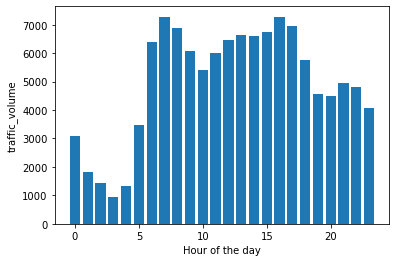

In [6]:
# Categorizing each row as either "day" or "night"
traffic["time_of_day"] = traffic["date_time"].dt.hour.apply(lambda x : "day" if x >= 7 and x < 19 else "night")
traffic["time_of_day"].value_counts()

# Quick overview of the traffic frequency over the hours
plt.bar(traffic["date_time"].dt.hour, traffic["traffic_volume"])
plt.xlabel("Hour of the day")
plt.ylabel("traffic_volume")
plt.show()

> The following hours were decided upon as the criterion for distinguishing between night and day:
> - Daytime : 7 AM to 7 PM
> - Nighttime : 7 PM to 7 AM
 
> We can see that traffic is usually high during the hours of 7 AM and around 4 PM. This outcome is expected as these are the times people typically go to and come from work. We see that in the early hours of the day (12 AM to 4 AM) traffic is quite low as the majority of people are still at home sleeping or getting ready for work. Traffic also tapers off after 6 PM as people are already back at home from work and not out in the streets.

## Part 2: Analyzing The Data

### Analyzing Traffic Volume by Different Time Intervals
In this section, we will be analyzing traffic volumes on monthly, daily, and hourly levels.

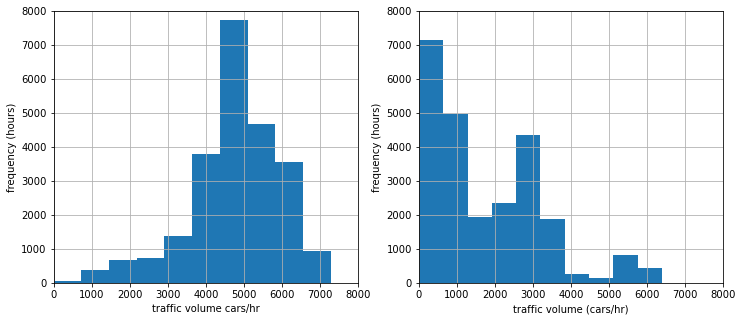

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   

In [7]:
# Separating "night" and "day" data
daytime_data = traffic[traffic["time_of_day"] == 'day']
nighttime_data = traffic[traffic["time_of_day"] == 'night']

# Plotting the points to analyze the disribution
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
daytime_data["traffic_volume"].hist()
plt.xlabel("traffic volume cars/hr")
plt.ylabel("frequency (hours)")
plt.ylim([0,8000])
plt.xlim([0,8000])

plt.subplot(1,2,2)
nighttime_data["traffic_volume"].hist()
plt.xlabel("traffic volume (cars/hr)")
plt.ylabel("frequency (hours)")
plt.ylim([0,8000])
plt.xlim([0,8000])
plt.show()

print(daytime_data["traffic_volume"].describe())
print("\n")
print(nighttime_data['traffic_volume'].describe())
print('\n')
print(daytime_data.info())

# Calculating the Skewness for the day and the night
day_mean = daytime_data["traffic_volume"].mean()
day_median = daytime_data["traffic_volume"].median()
day_std_dev = st.stdev(daytime_data["traffic_volume"])

night_mean = nighttime_data["traffic_volume"].mean()
night_median = nighttime_data["traffic_volume"].median()
night_std_dev = st.stdev(nighttime_data["traffic_volume"])

print("Daytime Skewness : ", (3*(day_mean - day_median)) / day_std_dev)
print("Nighttime Skewness : ", (3*(night_mean - night_median)) / night_std_dev)


> We see that the traffic during the day is negatively skewed with skewness of -0.148, meaning that a large portion of the rows/data points are clustered on the right side of the graph, in our case this represents higher traffic volumes. This indicates that the majority of hours during the day have traffic. We see that for 75% of hours during the day the traffic volume is higher than 4252 cars. On the other hand, we observe the complete opposite during the nighttime. The traffic during the day is positively skewed with a skewness of roughly 1, where most of the data points cluster around the left side of the graph - lower traffic volume. For only 25% of the time during the night, the traffic volume is above 2819 cars - this is probably during the early hours of the night (8 PM) where people are still heading home from work. Since this analysis is mainly focused on analyzing high traffic indicators, moving forwards we will shift our analysis to daytime data.

In [8]:
def grid_chart_generator(data, time_interval, nighttime = False):
    year_list = data["year"].unique()
    yearly_time_traffic_avg = {}
    
    for year in year_list:
        year_rows = data[data["year"] == year]
        if time_interval == "hour": #we do this step here because we are more interested on the workingdays, since they have significantly more traffic volumes
            year_rows = year_rows[year_rows["weekday"] <= 4]
        print(year_rows.shape[0])
        time_traffic_avg = year_rows.groupby(time_interval)["traffic_volume"].mean()
        if nighttime == True and time_interval == "hour":
            time_traffic_avg.rename({20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 1: 25, 2: 26, 3: 27, 4: 28, 5: 29, 6: 30}, inplace = True)
        time_traffic_avg.sort_index(inplace = True)
        yearly_time_traffic_avg[year] = time_traffic_avg
        
    
    plt.figure(figsize = (12,22))
    
    for i, year in zip(range(1,8), yearly_time_traffic_avg):
        plt.subplot(4,2,i)
        yearly_time_traffic_avg[year].plot.line()
        plt.title("Average Traffic Volume/{} in {}".format(time_interval, year))
        plt.xlabel(time_interval)
        plt.ylabel("Traffic Volume")
        
    plt.show()

> The above function outputs a line graph for each of the years present in the data. Depending on which options are selected, the output will either display data on a month, day, or hourly basis.

#### Traffic Volume by Month

1306
4235
2399
2145
4592
5229
3971


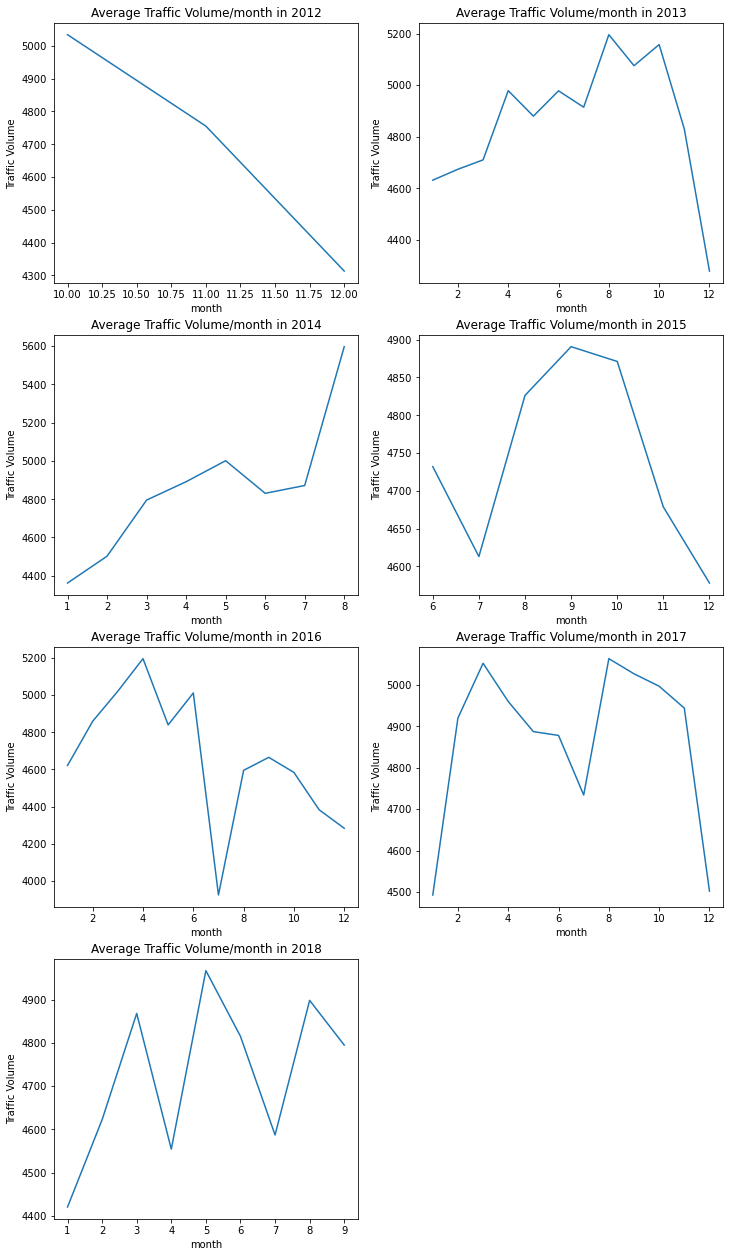

In [9]:
grid_chart_generator(daytime_data, "month")

> Here we are looking at traffic volume for each month of every year. Since the data collected is from October 2012 to September 2018, this means that we only have data for the last few months of 2012 up until only September 2018. However, we also have some gaps in our data for the years 2014 and 2015. For a more accurate overview of the average traffic volume per month, we will look at the years 2013, 2016, 2017 as they have data for all their months. Throughout these 3 years, we see that traffic is kept at a minimum during the winter months and peaks towards the month of March and August. Both of these months are during the seasons of Spring and Autumn - transitional seasons, where the weather is considered to be at its best, which could explain the high traffic volumes. We also observe that July has low traffic volumes, but more specifically in the year 2016, the traffic volume was close to 0, which could be indicative of a natural disaster. July is in the middle of summer and is usually the month where the heat is at its peak. This could be a reason for the low traffic volumes during the month.

#### Traffic Volume by Days of The Week

1306
4235
2399
2145
4592
5229
3971


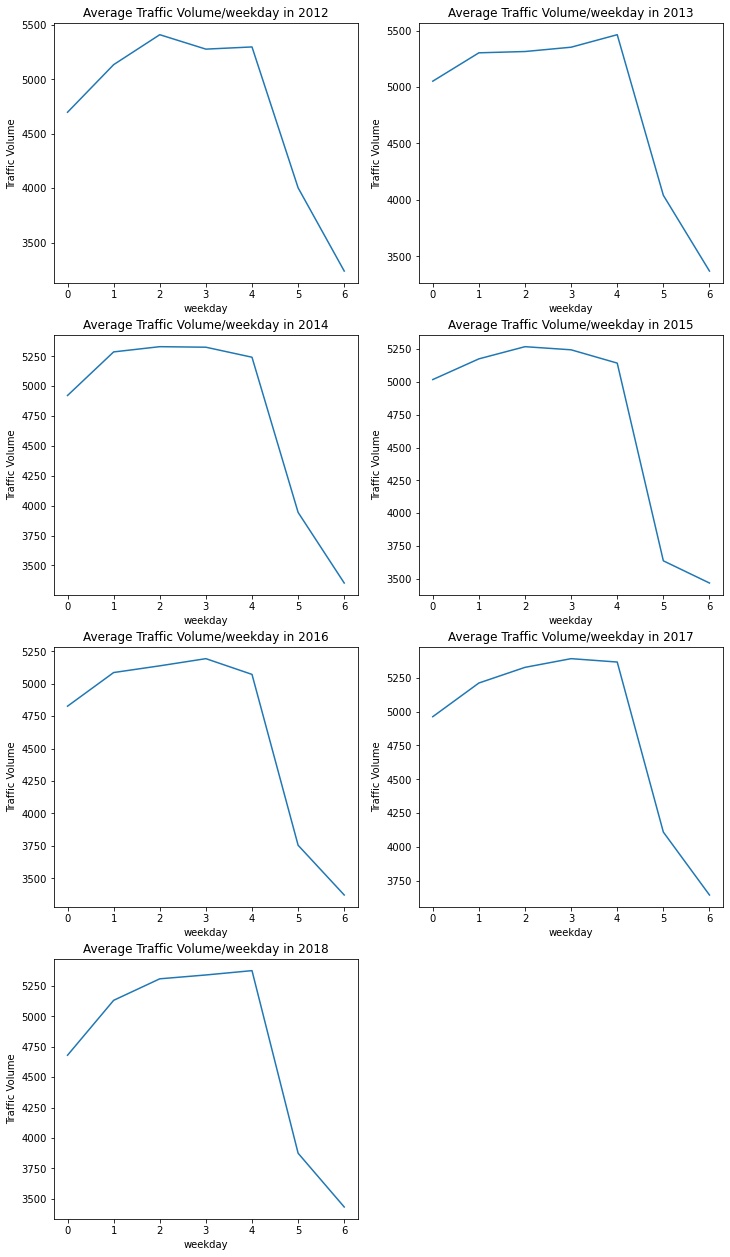

In [10]:
grid_chart_generator(daytime_data, "weekday")

> As expected, we see traffic is heavy during the weekend and plummets on the weekend. This is because people are constantly traveling to work during the week, while the weekend is usually spent at home. Interestingly, we constantly see traffic gradually increase from Monday to Friday throughout the years (typically starting below 5,000 cars and then increasing to beyond 5,000 cars).

#### Traffic Volume by Hour

899
3010
1709
1583
3290
3772
2822


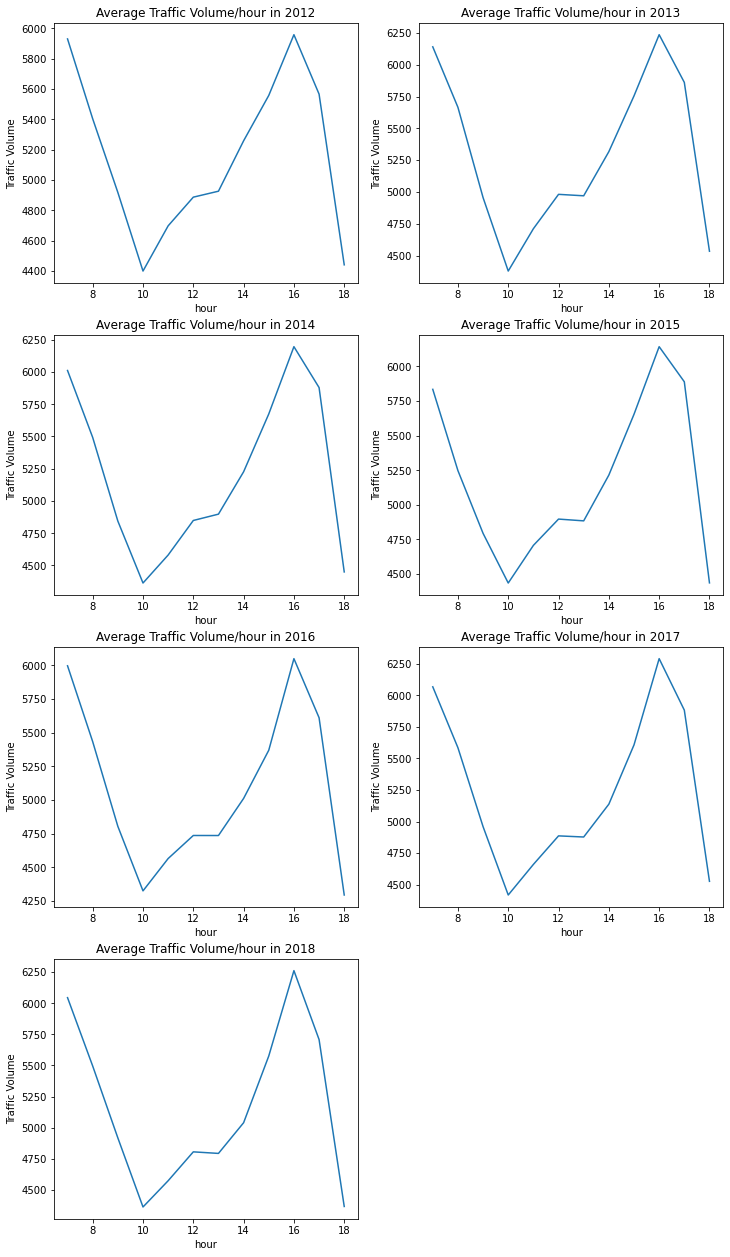

In [11]:
grid_chart_generator(daytime_data, "hour")

> The rush hours are typical during 7 AM and 4 PM as traffic volumes soar beyond 5,000 cars. At 10 AM traffic volume is at its lowest, which is probably when people are well into their workday. We then see traffic volume gradually increase until it hits its peak at 4 PM. Past 4 PM, the traffic volume plummets.

In [12]:
# Calculating the correlations between the numerical columns
print(traffic.corr()["traffic_volume"])

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
year              0.004753
hour              0.352401
month            -0.002533
weekday          -0.149544
Name: traffic_volume, dtype: float64


> There doesn't seem to be much correlation between traffic volume and any of the other numerical columns. Although not really strong, The "temp" column has the strongest correlation with the "traffic_volume". None of these columns are good indicators of traffic volume.

### Analyzing Traffic Volume by Weather Type
> Since none of the numerical columns have significant correlations with "traffic_volume", and hence are not good indicators of traffic volume, we will explore the categorical columns "weather_main" and "weather_description" to see if they are indicators of traffic volume. 

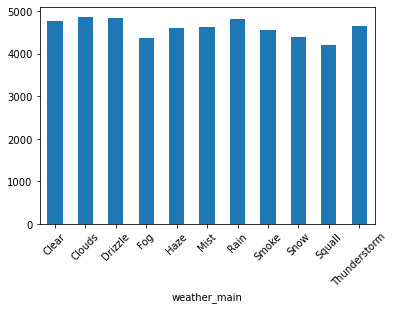

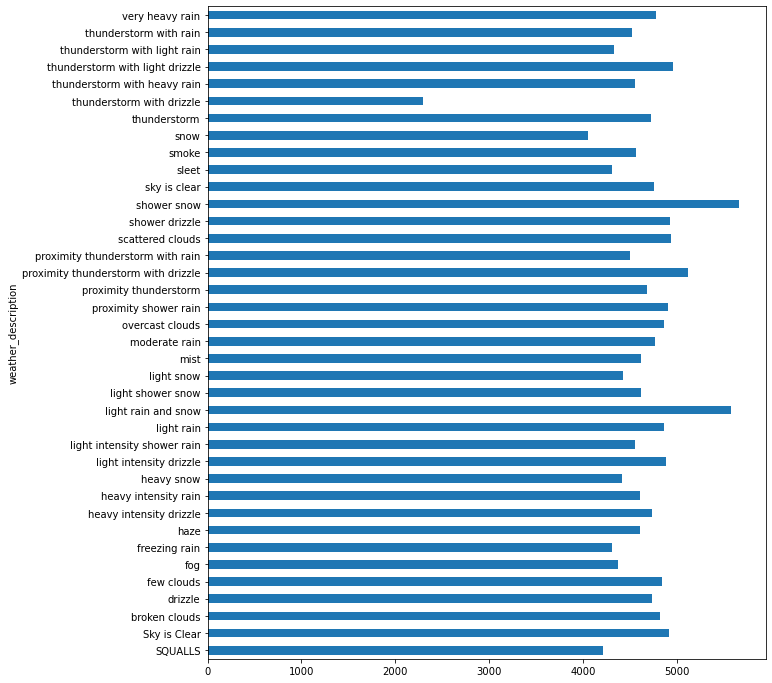

In [13]:
weather_main_vs_traffic_avg = daytime_data.groupby("weather_main")["traffic_volume"].mean()
weather_desc_vs_traffic_avg = daytime_data.groupby("weather_description")["traffic_volume"].mean()

# Plotting "weather_main"
weather_main_vs_traffic_avg.plot.bar()
plt.xticks(rotation = 45)
plt.show()

# Plotting "weather_description"
weather_desc_vs_traffic_avg.plot.barh(figsize = (10,12))
plt.show()

> It seems like all the weather types have similar effects on traffic volume. However, neither of the weather types cause traffic to surge past 5,000 cars. These weather types still seem to influence traffic volumes, but we cannot conclude that they are the cause for such levels of traffic. Looking at the weather descriptions, the three descriptions; "shower snow", "light rain and snow", and "proximity thunderstorm with rain" seem to correlate positively with traffic volume and are the only weather descriptions where traffic volumes are past 5,000. It is unclear as to why cars would be on the road during these weather conditions, perhaps cars were already on the road before the weather took a turn for the worst, making the weather itself the cause of traffic.  

## Conclusion
> After analyzing both time and weather, we can conclude that traffic is typically heavier during the warmer months, more specifically during the months of March and August. We suggest that this could be due to the fact that such months are during the seasons of Spring and Autumn - transitional seasons where the weather is considered optimal. For this reason, more people are out and about and are causing traffic volumes to surge. As expected, we discovered that that traffic is usually heavier on business days compared to weekdays, where the rush hours are 7 AM and 4 PM. We also concluded that when the weather descriptions are "shower snow", "light rain and snow", or "proximity thunderstorm with rain", the traffic volumes surge past 5,000 cars. These findings might contradict each other where there is always traffic in good weather and in bad weather, however, we belive that traffic is present during bad weather, because cars are already on the road before the weather worsens.

In [14]:
%%html
<style>
.nbviewer div.output_area {
  overflow-y: auto;
  max-height: 400px;
}
</style>